# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Reading Retinopathy Data

In [2]:
df=pd.read_excel("cleaned_pronostico_dataset.xlsx")

In [3]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [4]:
df.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [5]:
df.shape

(6000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [7]:
df.age=df.age.astype(int)

In [8]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77,85.288742,80.021878,79.957109,retinopathy
1,1,63,99.379736,84.852361,110.382411,retinopathy
2,2,69,111.349455,109.850616,100.828246,retinopathy
3,3,82,95.056128,79.666851,87.066303,retinopathy
4,4,78,109.154591,90.713220,92.511770,retinopathy


# Checking for null Values

In [9]:
df.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

# Checking for duplicate values

In [10]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [11]:
df=df.drop('ID',axis=1)
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77,85.288742,80.021878,79.957109,retinopathy
1,63,99.379736,84.852361,110.382411,retinopathy
2,69,111.349455,109.850616,100.828246,retinopathy
3,82,95.056128,79.666851,87.066303,retinopathy
4,78,109.154591,90.713220,92.511770,retinopathy


In [12]:
df['prognosis'].value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

# Checking  Depedent Variable is symmetric or not?

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prognosis', ylabel='count'>

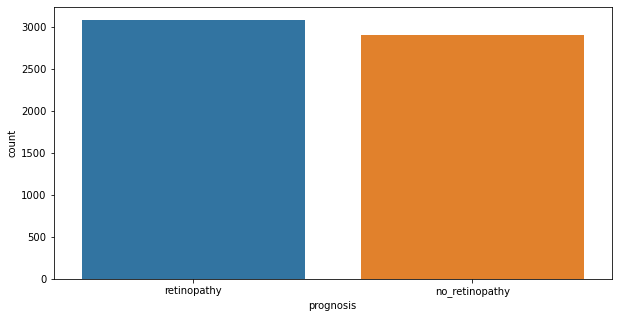

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['prognosis'])

Conclusion: As per the graph no of Zeros(no retinopathy) and no of ones(ratinopathy) value counts are almost equal.so we can
    consider this as symmetrically distributed data for building models.

# Checking How Features are Distributed from its Mean value by Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x10c52159160>,
 'caps': [<matplotlib.lines.Line2D at 0x10c521597c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10c52128cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x10c52159ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10c5215e2b0>],
 'means': []}

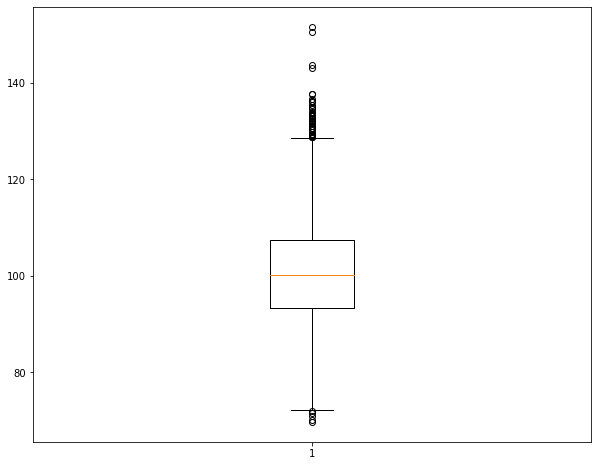

In [14]:
plt.figure(figsize=(10,8))
plt.boxplot(df.systolic_bp)

{'whiskers': [<matplotlib.lines.Line2D at 0x10c5226a6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x10c5226adf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10c5226a340>],
 'medians': [<matplotlib.lines.Line2D at 0x10c52289550>],
 'fliers': [<matplotlib.lines.Line2D at 0x10c522898e0>],
 'means': []}

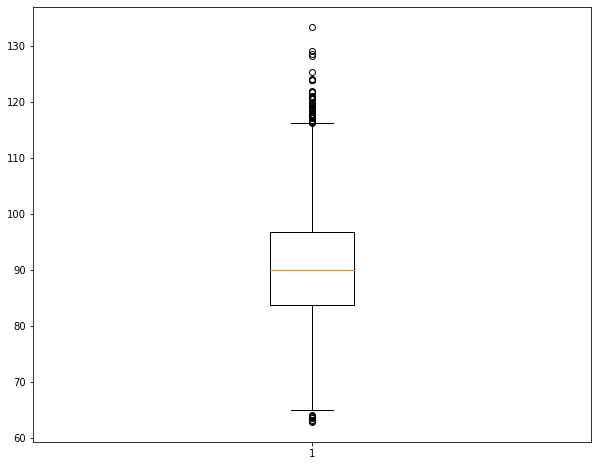

In [15]:
plt.figure(figsize=(10,8))
plt.boxplot(df.diastolic_bp)

{'whiskers': [<matplotlib.lines.Line2D at 0x10c521ac5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x10c521acd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x10c521ac250>],
 'medians': [<matplotlib.lines.Line2D at 0x10c521b0460>],
 'fliers': [<matplotlib.lines.Line2D at 0x10c521b07f0>],
 'means': []}

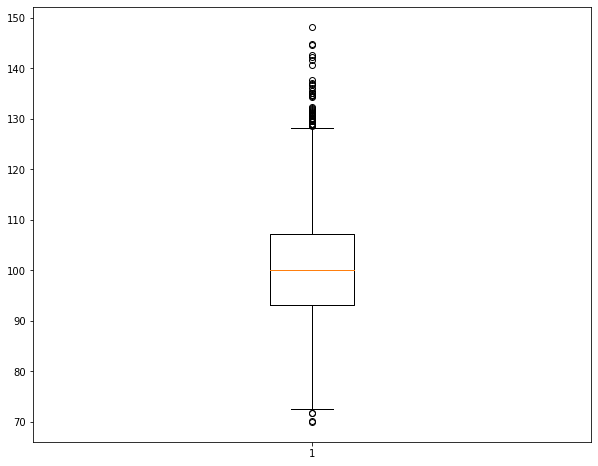

In [16]:
plt.figure(figsize=(10,8))
plt.boxplot(df.cholesterol)

In [17]:
df.skew(axis=0,skipna=True)

C:\Users\parth\AppData\Local\Temp/ipykernel_1344/4266299306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0,skipna=True)


age             0.441397
systolic_bp     0.334655
diastolic_bp    0.336555
cholesterol     0.361514
dtype: float64

# How independent features are related to each other?

In [18]:
df.corr()

,age,systolic_bp,diastolic_bp,cholesterol
age,1.000000,0.010493,-0.004957,-0.007063
systolic_bp,0.010493,1.000000,0.405406,0.406029
diastolic_bp,-0.004957,0.405406,1.000000,0.398345
cholesterol,-0.007063,0.406029,0.398345,1.000000


[]

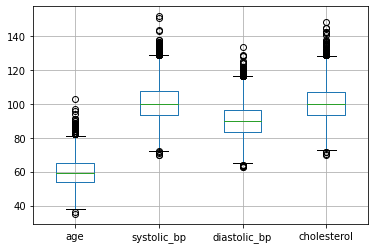

In [19]:
df.boxplot(return_type='dict')
plt.plot()

### From the above plot we can see the outliers in our independent variables, But when deep dived looking at the plot we can clearly see that the systolic_bp level are above 120 which is not normal when considered in an average normal healthy person i.e people having systolic_bp more than 120 are 97% going to have retinopathy according to the dataset, Similarly the normal cholesterol levels are below 130 for an adult above 20 years, above which people will be 99% having illness such as heart conditions/retinopathy, therefore coming to the conclusion when compared with all the variables the data which is being showed as an outlier will not be affecting our model building as they are important values.

##### Ref Link - https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [21]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
sb.set_style('whitegrid')

<AxesSubplot:xlabel='prognosis', ylabel='cholesterol'>

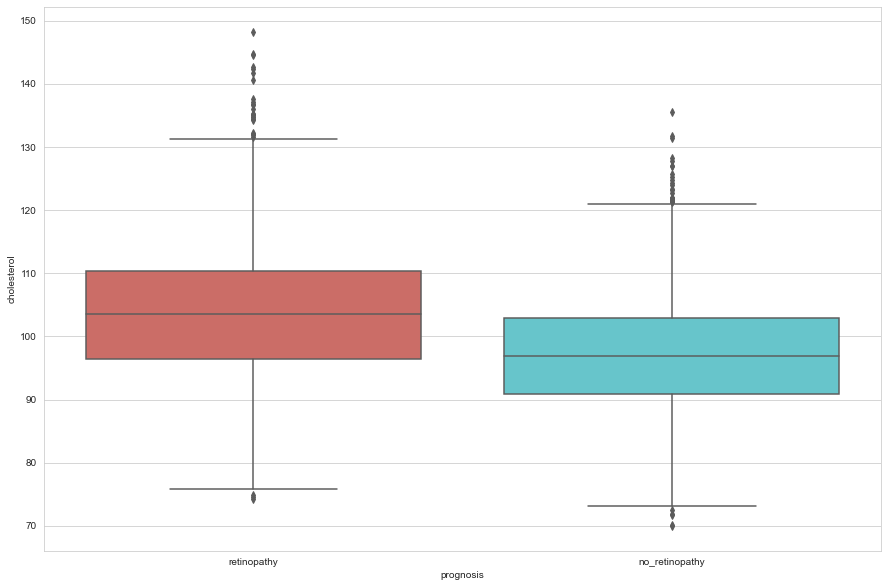

In [22]:
sb.boxplot(x='prognosis', y='cholesterol', data=df, palette='hls')

### As explained previously in the Box-Plot comparison, the people having cholesterol level above 130 are going to have retinopathy such that we can conclude that removing the outliers is not required as it will not create any bias in our analysis/results 

##### Ref Link - https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

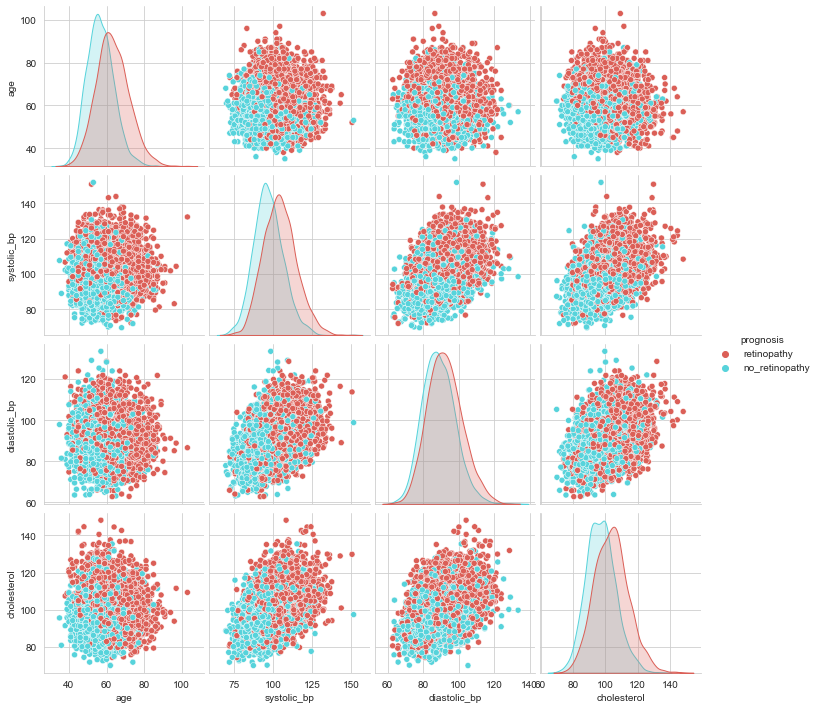

In [23]:
sb.pairplot(df, hue='prognosis', palette='hls')

#### From The above pair-plots we can see that our dataset needs transformation, to normalise the dataset 

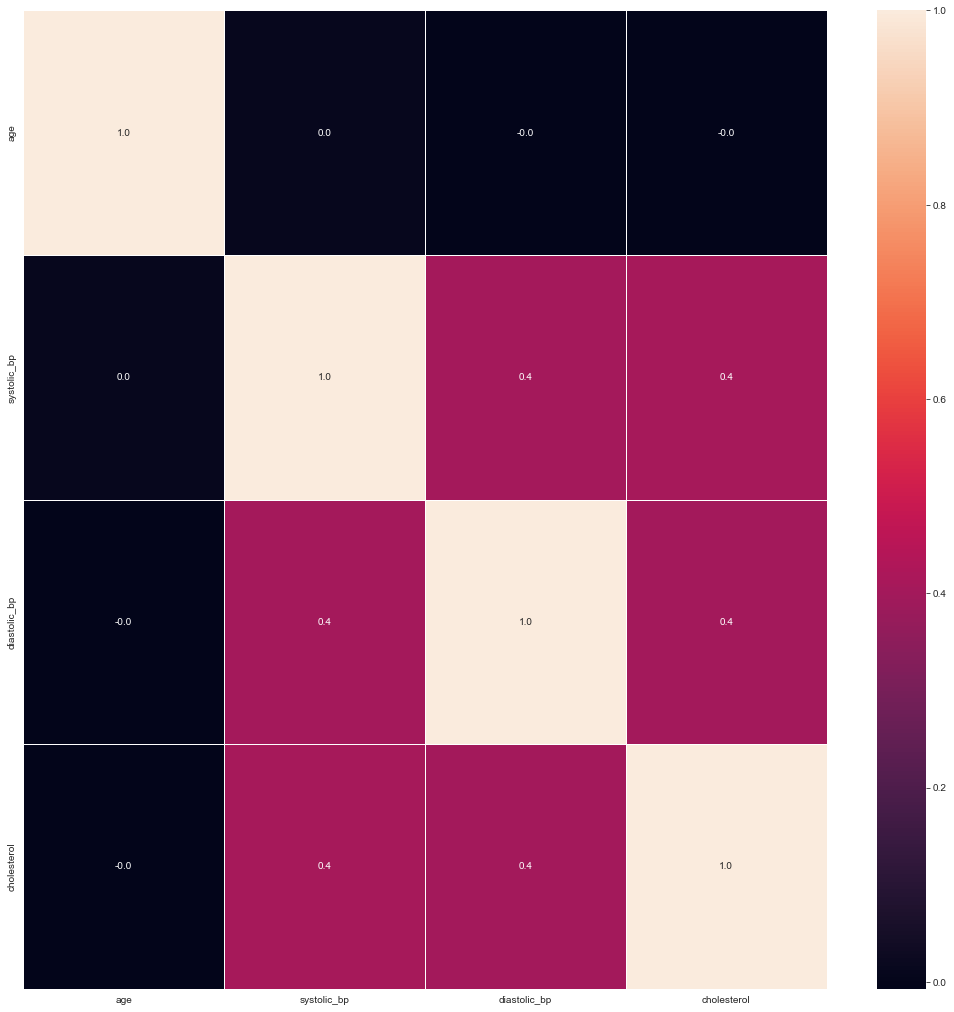

In [24]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

#### This heatmap shows the correlation between the features

Text(0, 0.5, 'diastolic_bp')

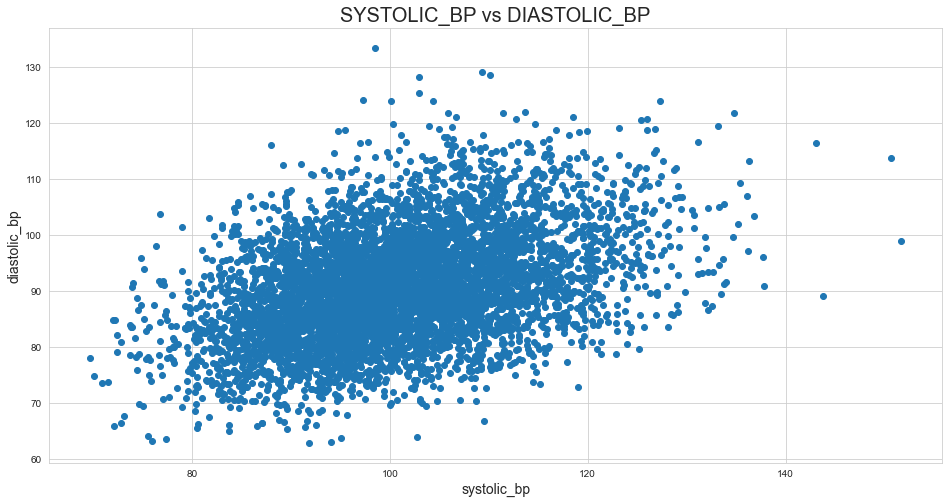

In [25]:
plt.figure(figsize=(16,8))
plt.scatter(df['systolic_bp'],df['diastolic_bp'])
plt.title("SYSTOLIC_BP vs DIASTOLIC_BP",fontsize=20 )
plt.xlabel('systolic_bp',fontsize=14)
plt.ylabel('diastolic_bp',fontsize=14)

Text(0, 0.5, 'cholesterol')

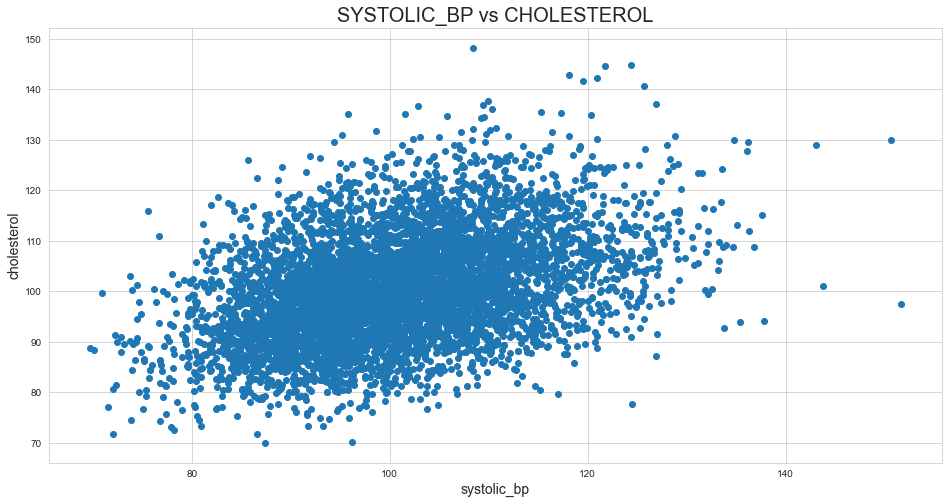

In [26]:
plt.figure(figsize=(16,8))
plt.scatter(df['systolic_bp'],df['cholesterol'])
plt.title("SYSTOLIC_BP vs CHOLESTEROL",fontsize=20 )
plt.xlabel('systolic_bp',fontsize=14)
plt.ylabel('cholesterol',fontsize=14)

Text(0, 0.5, 'cholesterol')

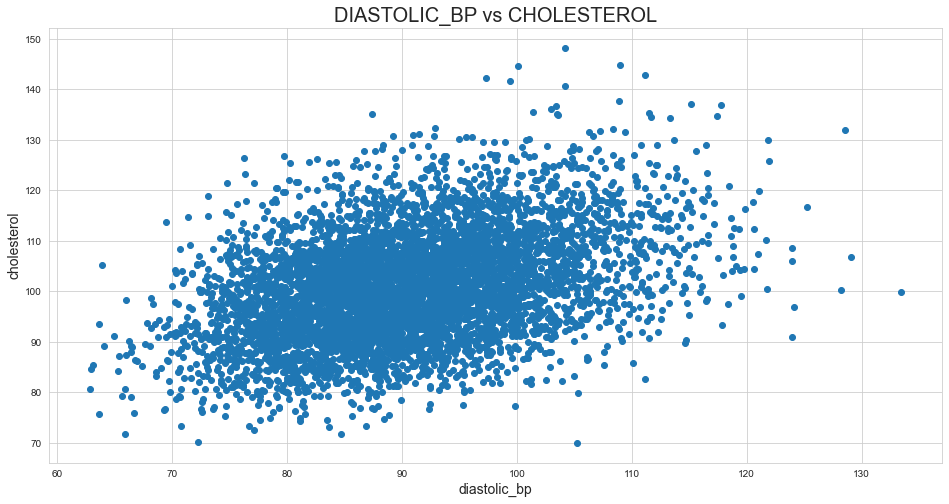

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(df['diastolic_bp'],df['cholesterol'])
plt.title("DIASTOLIC_BP vs CHOLESTEROL",fontsize=20 )
plt.xlabel('diastolic_bp',fontsize=14)
plt.ylabel('cholesterol',fontsize=14)

Conclusion: From the Calculated value of corelation between these features(i.e 0.4) and from above graph we can say there is no clear correlation between them it is close to Randomness

# Converting Catergorical value to numerical value for dependent feature "prognosis"

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in df.prognosis:
    df.prognosis=label_encoder.fit_transform(df.prognosis)
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77,85.288742,80.021878,79.957109,1
1,63,99.379736,84.852361,110.382411,1
2,69,111.349455,109.850616,100.828246,1
3,82,95.056128,79.666851,87.066303,1
4,78,109.154591,90.713220,92.511770,1


In [51]:
import scipy.stats as stat
import pylab 

## After converting the categorical data to numerical data we'll apply Gaussian Transformation

### There are different Feature Engineering methods like, standardization, normalization, transformation, backpropagation to name a few. Out of which we choose to go ahead with the transformation method

### Gaussian Transformation

In [52]:
#### If you want to check whether feature is guassian or normal distributed
#### Normal Q-Q plot on raw data
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

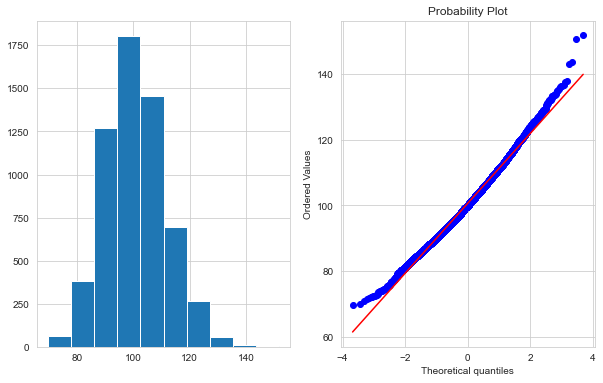

In [53]:
plot_data(df,'systolic_bp')

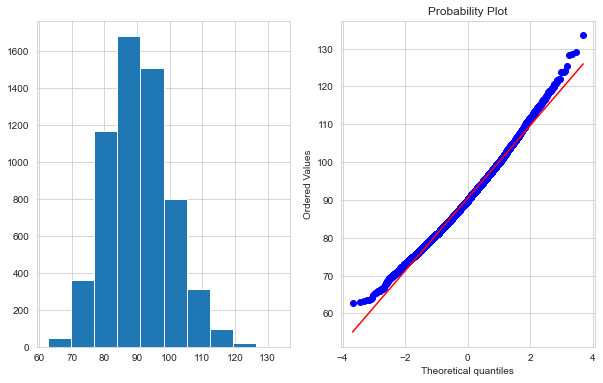

In [54]:
plot_data(df,'diastolic_bp')

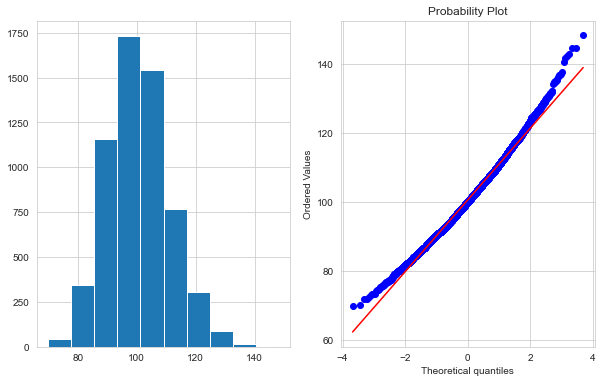

In [55]:
plot_data(df,'cholesterol')

### Logarithmic Transformation

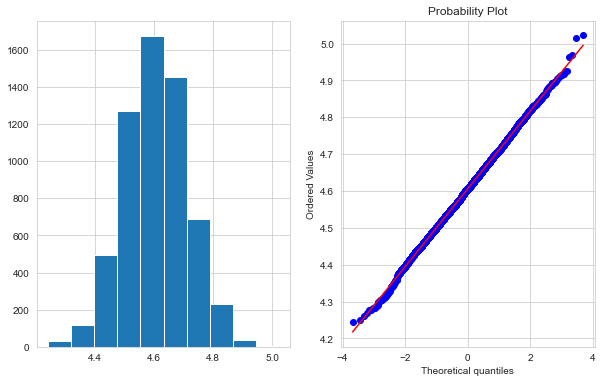

In [56]:
import numpy as np
df['systolic_bp_log']=np.log(df['systolic_bp'])
plot_data(df,'systolic_bp_log')

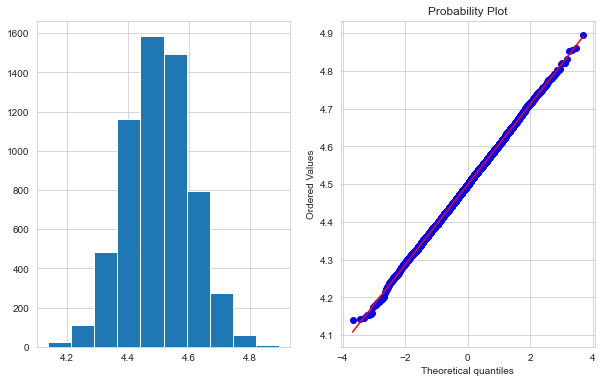

In [57]:
df['diastolic_bp_log']=np.log(df['diastolic_bp'])
plot_data(df,'diastolic_bp_log')

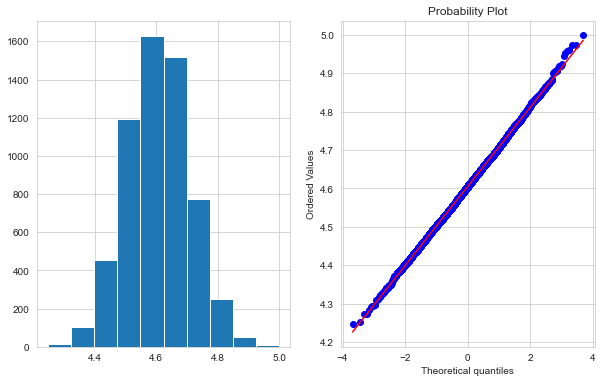

In [58]:
df['cholesterol_log']=np.log(df['cholesterol'])
plot_data(df,'cholesterol_log')

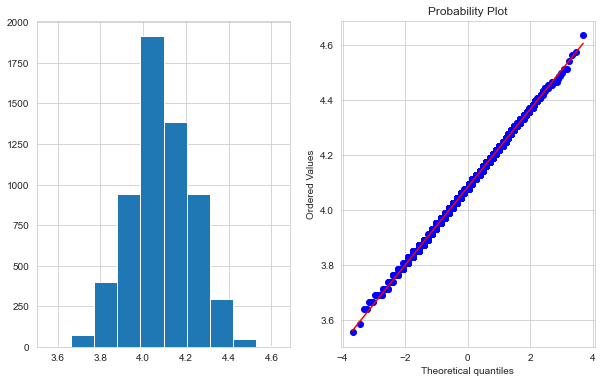

In [59]:
df['age_log']=np.log(df['age'])
plot_data(df,'age_log')

### Reciprocal Transformation

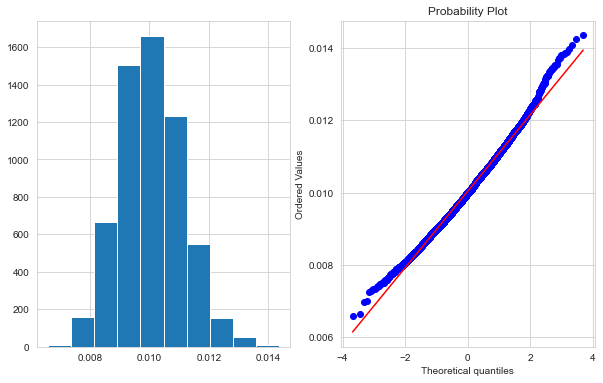

In [60]:
df['systolic_bp_reciprocal']=1/df.systolic_bp
plot_data(df,'systolic_bp_reciprocal')

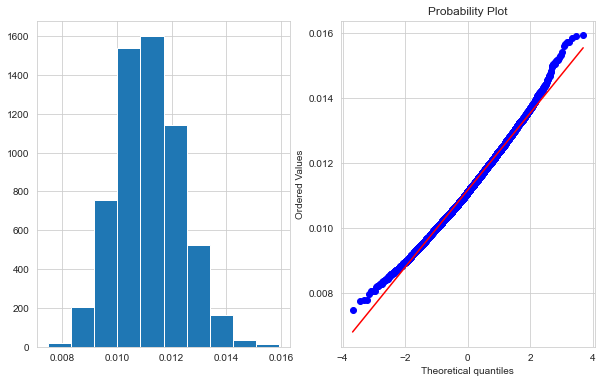

In [61]:
df['diastolic_bp_reciprocal']=1/df.diastolic_bp
plot_data(df,'diastolic_bp_reciprocal')

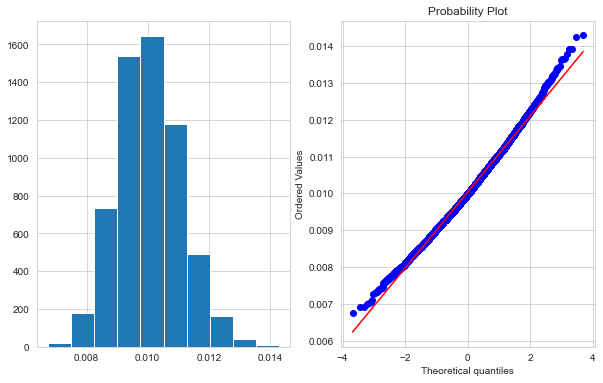

In [62]:
df['cholesterol_reciprocal']=1/df.cholesterol
plot_data(df,'cholesterol_reciprocal')

### SQRT Transformation

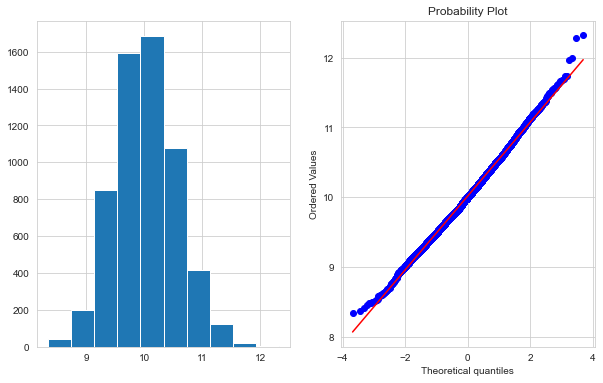

In [63]:
df['systolic_bp_sqaure']=df.systolic_bp**(1/2)
plot_data(df,'systolic_bp_sqaure')

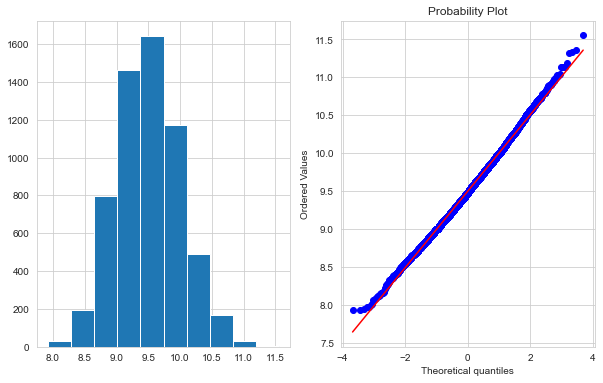

In [64]:
df['diastolic_bp_sqaure']=df.diastolic_bp**(1/2)
plot_data(df,'diastolic_bp_sqaure')

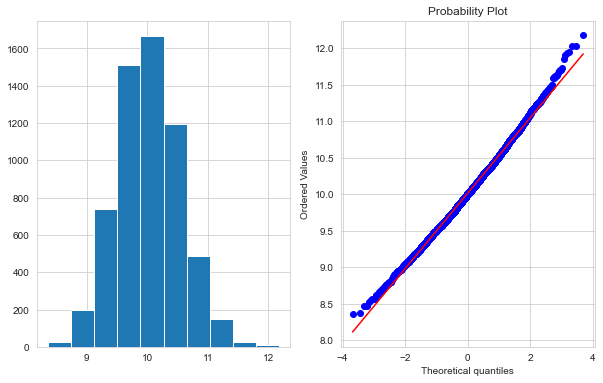

In [65]:
df['cholesterol_sqaure']=df.cholesterol**(1/2)
plot_data(df,'cholesterol_sqaure')

### Exponential Transformation

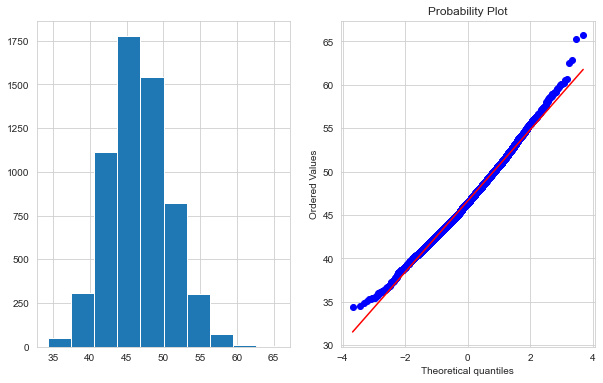

In [66]:
df['systolic_bp_exponential']=df.systolic_bp**(1/1.2)
plot_data(df,'systolic_bp_exponential')

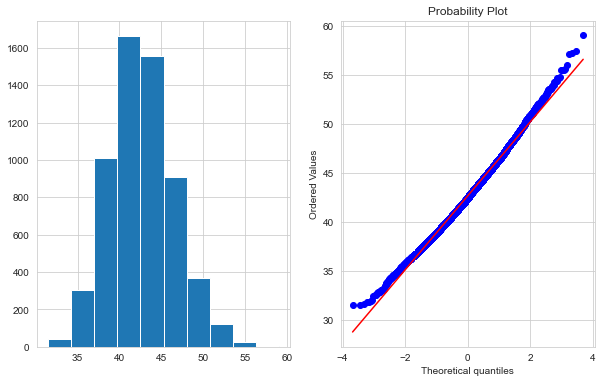

In [67]:
df['diastolic_bp_exponential']=df.diastolic_bp**(1/1.2)
plot_data(df,'diastolic_bp_exponential')

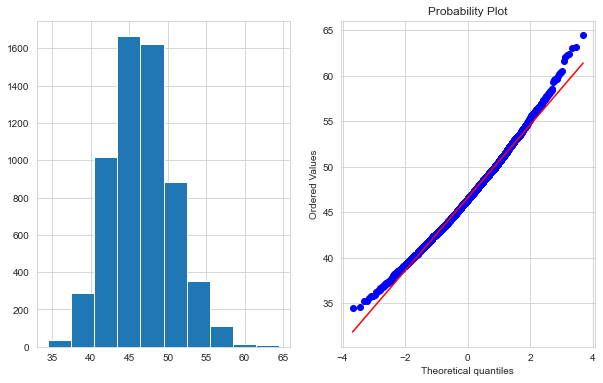

In [68]:
df['cholesterol_exponential']=df.cholesterol**(1/1.2)
plot_data(df,'cholesterol_exponential')

### Box - Cox Transformation

In [69]:
df['systolic_bp_Boxcox'],parameters=stat.boxcox(df['systolic_bp'])
print(parameters)

-0.03799051767399304


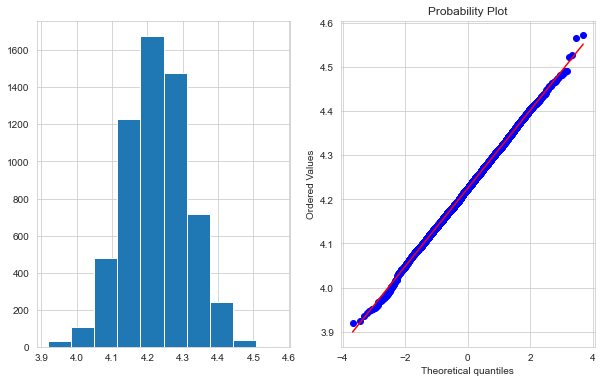

In [70]:
plot_data(df,'systolic_bp_Boxcox')

In [71]:
df['diastolic_bp_Boxcox'],parameters=stat.boxcox(df['diastolic_bp'])
print(parameters)

-0.06091965006551369


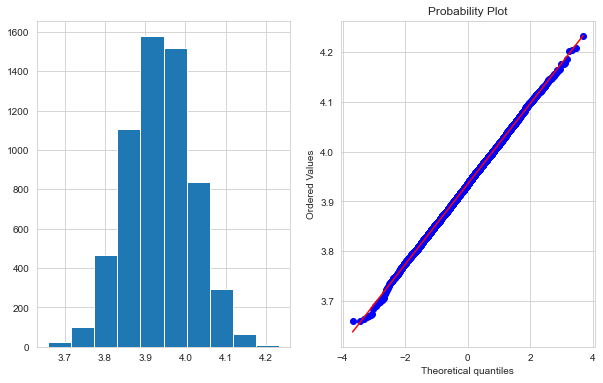

In [72]:
plot_data(df,'diastolic_bp_Boxcox')

In [73]:
df['cholesterol_Boxcox'],parameters=stat.boxcox(df['cholesterol'])
print(parameters)

-0.1476435642180612


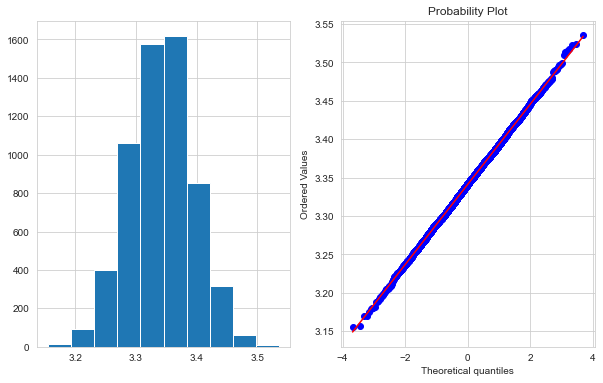

In [74]:
plot_data(df,'cholesterol_Boxcox')

## After analyzing all the transformations applied, like Log-Trans, Exponential-Trans, SQRT-Trans, Box-Cox Trans, the Log-Transformation seems to be the most near to normalization, as the data fits perfectly on the line. So considering the log_transformed data as our final dataset for the model building part we proceed.

### Which Machine Learning Models Are Sensitive To Outliers?

#### Naivye Bayes Classifier--- Not Sensitive To Outliers  
#### SVM-------- Not Sensitive To Outliers
#### Linear Regression---------- Sensitive To Outliers
#### Logistic Regression------- Sensitive To Outliers
#### Decision Tree Regressor or Classifier---- Not Sensitive
#### Ensemble(RF,XGboost,GB)------- Not Sensitive
#### KNN--------------------------- Not Sensitive
#### Kmeans------------------------ Sensitive
#### Hierarichal------------------- Sensitive
#### PCA-------------------------- Sensitive
#### Neural Networks-------------- Sensitive

#### So Based on the above Model data, it concludes that outliers are not going to affect our analysis/results in any way!
#### So Going ahead with all the different model building techniques

In [75]:
df

,age,systolic_bp,diastolic_bp,cholesterol,prognosis,systolic_bp_log,diastolic_bp_log,cholesterol_log,age_log,systolic_bp_reciprocal,...,cholesterol_reciprocal,systolic_bp_sqaure,diastolic_bp_sqaure,cholesterol_sqaure,systolic_bp_exponential,diastolic_bp_exponential,cholesterol_exponential,systolic_bp_Boxcox,diastolic_bp_Boxcox,cholesterol_Boxcox
0,77,85.288742,80.021878,79.957109,1,4.446042,4.382300,4.381490,4.343805,0.011725,...,0.012507,9.235190,8.945495,8.941874,40.651486,38.548482,38.522480,4.090835,3.846092,3.226235
1,63,99.379736,84.852361,110.382411,1,4.598948,4.440913,4.703951,4.143135,0.010062,...,0.009059,9.968939,9.211534,10.506303,46.175846,40.478083,50.398378,4.219603,3.890891,3.391140
2,69,111.349455,109.850616,100.828246,1,4.712673,4.699121,4.613419,4.234107,0.008981,...,0.009918,10.552225,10.480964,10.041327,50.766055,50.195958,46.736033,4.314891,4.086355,3.345632
3,82,95.056128,79.666851,87.066303,1,4.554468,4.377854,4.466670,4.406719,0.010520,...,0.011485,9.749673,8.925629,9.330933,44.495569,38.405908,41.356307,4.182221,3.842687,3.270561
4,78,109.154591,90.713220,92.511770,1,4.692765,4.507703,4.527336,4.356709,0.009161,...,0.010809,10.447707,9.524349,9.618304,49.930779,42.794913,43.500825,4.298240,3.941747,3.301793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,49,94.857639,86.615671,107.643986,0,4.552377,4.461481,4.678829,3.891820,0.010542,...,0.009290,9.739489,9.306754,10.375162,44.418129,41.177856,49.354279,4.180463,3.906574,3.378573
5996,63,100.039527,93.515186,104.971404,1,4.605565,4.538124,4.653688,4.143135,0.009996,...,0.009526,10.001976,9.670325,10.245555,46.431177,43.893659,48.331006,4.225159,3.964841,3.365949
5997,55,98.421446,102.697875,120.875951,1,4.589259,4.631791,4.794765,4.007333,0.010160,...,0.008273,9.920758,10.133996,10.994360,45.804497,47.457102,54.360476,4.211465,4.035682,3.436182
5998,63,106.809289,88.060631,106.052213,1,4.671045,4.478026,4.663932,4.143135,0.009362,...,0.009429,10.334858,9.384063,10.298166,49.035151,41.749521,48.745341,4.280059,3.919175,3.371098


In [76]:
# Dividing our data into input and output variables 
X = df.drop(['age','prognosis','systolic_bp','diastolic_bp','cholesterol','systolic_bp_reciprocal','diastolic_bp_reciprocal','cholesterol_reciprocal','systolic_bp_sqaure','diastolic_bp_sqaure','cholesterol_sqaure','systolic_bp_exponential','diastolic_bp_exponential','cholesterol_exponential','systolic_bp_Boxcox','diastolic_bp_Boxcox','cholesterol_Boxcox'],1)
Y = df['prognosis']

C:\Users\parth\AppData\Local\Temp/ipykernel_1344/1030230230.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['age','prognosis','systolic_bp','diastolic_bp','cholesterol','systolic_bp_reciprocal','diastolic_bp_reciprocal','cholesterol_reciprocal','systolic_bp_sqaure','diastolic_bp_sqaure','cholesterol_sqaure','systolic_bp_exponential','diastolic_bp_exponential','cholesterol_exponential','systolic_bp_Boxcox','diastolic_bp_Boxcox','cholesterol_Boxcox'],1)


In [77]:
X

,systolic_bp_log,diastolic_bp_log,cholesterol_log,age_log
0,4.446042,4.382300,4.381490,4.343805
1,4.598948,4.440913,4.703951,4.143135
2,4.712673,4.699121,4.613419,4.234107
3,4.554468,4.377854,4.466670,4.406719
4,4.692765,4.507703,4.527336,4.356709
...,...,...,...,...
5995,4.552377,4.461481,4.678829,3.891820
5996,4.605565,4.538124,4.653688,4.143135
5997,4.589259,4.631791,4.794765,4.007333
5998,4.671045,4.478026,4.663932,4.143135


In [78]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int64

### Building Logistic Regression

In [79]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
classifier = LogisticRegression(max_iter = 400)
classifier.fit(X,Y)

LogisticRegression(max_iter=400)

In [80]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [81]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [82]:
y_pred_df

,actual,predicted_prob
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
5995,0,0
5996,1,1
5997,1,1
5998,1,1


In [83]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[2137  776]
 [ 774 2313]]


In [84]:
accuracy_1 = ((2137+2313)/(2137+2313+776+774))*100
accuracy_1 

74.16666666666667

In [85]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2913
           1       0.75      0.75      0.75      3087

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000



### Building Random Forest Classifier using Entropy Criteria

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=30, test_size=0.30)
X_train.shape, X_test.shape

((4200, 4), (1800, 4))

In [88]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, criterion = 'entropy')
model.fit(X_train,Y_train)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7328333333333333


In [89]:
accuracy_2 = results.mean()*100
accuracy_2

73.28333333333333

In [90]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    931
0    869
dtype: int64

In [91]:
# Accuracy 
np.mean(preds==Y_test)

0.7338888888888889

In [92]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       869
           1       0.74      0.74      0.74       931

    accuracy                           0.73      1800
   macro avg       0.73      0.73      0.73      1800
weighted avg       0.73      0.73      0.73      1800



### Building XGB Classifier 

In [93]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [94]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [95]:
# fit model in training data
model = XGBClassifier()
model.fit(X_train, Y_train)

[20:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
# make predictions for test data
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts() # getting the count of each category 

1    1033
0     947
dtype: int64

In [97]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [98]:
# Accuracy 
accuracy_3 = np.mean(y_pred==Y_test)*100
accuracy_3

72.87878787878788

In [99]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       947
           1       0.75      0.72      0.73      1033

    accuracy                           0.73      1980
   macro avg       0.73      0.73      0.73      1980
weighted avg       0.73      0.73      0.73      1980



### Building LGBM Classifier

In [100]:
# split data into train and test sets
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=None)

In [101]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

LGBMClassifier()

In [102]:
# predict the results
y_predict=clf.predict(X_test)
pd.Series(y_pred).value_counts() # getting the count of each category 

1    1033
0     947
dtype: int64

In [103]:
# Accuracy 
accuracy_4 = np.mean(y_predict==Y_test)*100
accuracy_4

73.08080808080808

In [104]:
print(classification_report(y_predict,Y_test))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       930
           1       0.76      0.72      0.74      1050

    accuracy                           0.73      1980
   macro avg       0.73      0.73      0.73      1980
weighted avg       0.73      0.73      0.73      1980



### Building Using KNN Classifier

In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [106]:
num_folds = 10
kfold = KFold(n_splits=10)

In [107]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

In [108]:
print(results.mean())

0.7353333333333334


#### Grid Search For Algorithm Tuning

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
n_neighbors = np.array(range(30, 90))
param_grid = dict(n_neighbors=n_neighbors)

In [111]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 87, 88, 89])})

In [112]:
print(grid.best_score_)
print(grid.best_params_)

0.7466666666666667
{'n_neighbors': 81}


In [113]:
accuracy5 = grid.best_score_*100
accuracy5

74.66666666666667

### Building Decision Tree Classifier using Entropy Criteria

In [114]:
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [115]:
# Splitting data into training and testing data set
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

In [116]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [117]:
model.get_n_leaves()

4

In [118]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    695
0    505
dtype: int64

In [119]:
# Accuracy 
accuracy6=np.mean(preds==Y_test)*100
accuracy6

69.75

In [120]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       505
           1       0.77      0.68      0.72       695

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.71      0.70      0.70      1200



### Building Decision Tree Classifier (CART) using Gini Criteria

In [121]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [122]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

In [123]:
#Prediction and computing the accuracy
pred=model_gini.predict(X_test)
np.mean(pred==Y_test)

0.6975

In [124]:
accuracy7 = np.mean(pred==Y_test)*100
accuracy7

69.75

In [125]:
model_gini.get_n_leaves()

4

In [126]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       505
           1       0.77      0.68      0.72       695

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.71      0.70      0.70      1200



In [127]:
table = {'Classifier' : ['Logistic Regression', 'Random Forest Classifier Using Entropy', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier', 'KNN Using Grid Search For Algorithm Tuning', 'Decision Tree Classifier Using Entropy', 'Decision Tree Classifier Using Gini Criteria'], 'Accuracy Score' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy5, accuracy6, accuracy7]}
accuracy_table = pd.DataFrame(table)
accuracy_table

,Classifier,Accuracy Score
0,Logistic Regression,74.166667
1,Random Forest Classifier Using Entropy,73.283333
2,Xtreme Gradient Boosting Classifier,72.878788
3,Light Gradient Boosting Classifier,73.080808
4,KNN Using Grid Search For Algorithm Tuning,74.666667
5,Decision Tree Classifier Using Entropy,69.750000
6,Decision Tree Classifier Using Gini Criteria,69.750000
